<a href="https://colab.research.google.com/github/Divyanshiiii/Brain-Tumour-Detection/blob/main/brain_tumor_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data = []
labels = []
data_path="/content/drive/MyDrive/archive/brain_tumor_dataset"
for tumor_type in ['yes', 'no']:
    path_to_check = fr"{data_path}/{tumor_type}"
    print(f"Path being used: {path_to_check}")
    for r, d, f in os.walk(f"{data_path}/{tumor_type}"):
        print(tumor_type)
        for file in f:
            if '.jpg' in file:

                # image path
                path = os.path.join(r, file)

                # read the image and resize
                img = Image.open(path)
                img = img.resize((128,128))
                img = np.array(img)

                # if the size of the image is true
                if img.shape == (128,128,3):
                    data.append(img)

                    label = 0 if tumor_type == 'yes' else 1
                    labels.append(label)

Path being used: /content/drive/MyDrive/archive/brain_tumor_dataset/yes
yes
Path being used: /content/drive/MyDrive/archive/brain_tumor_dataset/no
no


In [ ]:
labels=np.array(labels)
labels.shape

(139,)

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

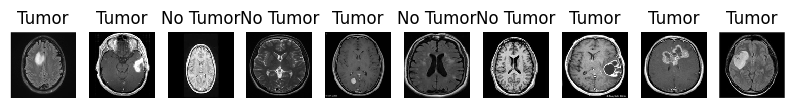

In [ ]:
num_samples_to_display = 10
random_indices = np.random.choice(len(data), num_samples_to_display, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(data[idx], interpolation='nearest')
    plt.title('Tumor' if labels[idx] == 0 else 'No Tumor')
    plt.axis('off')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size= 0.3, random_state= 42)
print(x_train.shape)
print(x_test.shape)

(97, 128, 128, 3)
(42, 128, 128, 3)


In [ ]:
def preProcess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255

    return img
x_train = np.array(list(map(preProcess, x_train)))
x_test = np.array(list(map(preProcess, x_test)))
x_train = x_train.reshape(-1, 128, 128,1)
x_test = x_test.reshape(-1, 128, 128,1)

In [ ]:
dataGen = ImageDataGenerator(width_shift_range= 0.1,
                             height_shift_range= 0.1,
                             zoom_range= 0.1,
                             rotation_range= 10)
dataGen.fit(x_train)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
model = Sequential()
model.add(Conv2D(32,input_shape = (128,128,1), kernel_size = (5,5), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units= 2, activation="softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = ("Adam"), metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 5s 1s/step - loss: 0.7737 - accuracy: 0.5258 - val_loss: 0.7744 - val_accuracy: 0.4524
Epoch 2/30
3/3 [==============================] - 4s 2s/step - loss: 0.7148 - accuracy: 0.5155 - val_loss: 0.6932 - val_accuracy: 0.4524
Epoch 3/30
3/3 [==============================] - 4s 931ms/step - loss: 0.6886 - accuracy: 0.5155 - val_loss: 0.6888 - val_accuracy: 0.4524
Epoch 4/30
3/3 [==============================] - 3s 989ms/step - loss: 0.6848 - accuracy: 0.5567 - val_loss: 0.6845 - val_accuracy: 0.4524
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 0.6686 - accuracy: 0.5258 - val_loss: 0.6716 - val_accuracy: 0.5238
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 0.6503 - accuracy: 0.5876 - val_loss: 0.6218 - val_accuracy: 0.7143
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 0.5984 - accuracy: 0.6804 - val_loss: 0.6302 - val_accuracy: 0.6667
Epoch 8/30
3/3 [===================

In [ ]:
score = model.evaluate(x_test,y_test, verbose = 1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

2/2 [==============================] - 1s 111ms/step - loss: 0.5954 - accuracy: 0.6667
Test loss:  0.595381498336792
Test accuracy:  0.6666666865348816


2/2 [==============================] - 0s 91ms/step


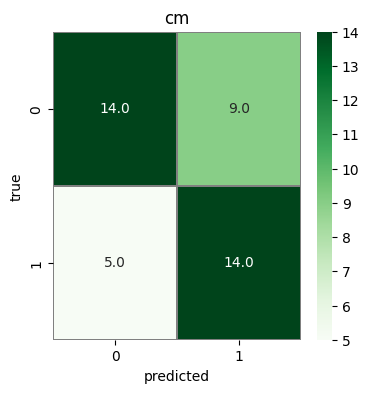

In [ ]:
y_pred = model.predict(x_test)

y_pred_class = np.argmax(y_pred, axis = 1)

Y_true = np.argmax(y_test, axis= 1)

cm = confusion_matrix(Y_true, y_pred_class)

f, ax = plt.subplots(figsize = (4,4))
sns.heatmap(cm, annot= True, linewidths= 0.01, cmap = "Greens", linecolor="gray", fmt= ".1f", ax = ax)
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("cm")
plt.show()

In [ ]:
a=model.predict(x_test)
b=np.argmax(a, axis = 1)
print(b)

2/2 [==============================] - 0s 79ms/step
[1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 0 1]


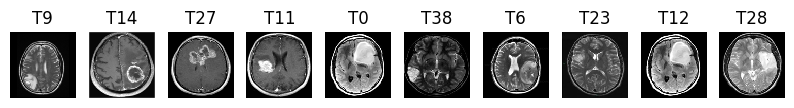

In [ ]:
num_samples_to_display = 10
random_indices = np.random.choice(len(x_test), num_samples_to_display, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(data[idx], interpolation='nearest')
    plt.title(f'T{idx}' if labels[idx] == 0 else f'NT{idx}')
    plt.axis('off')
plt.show()